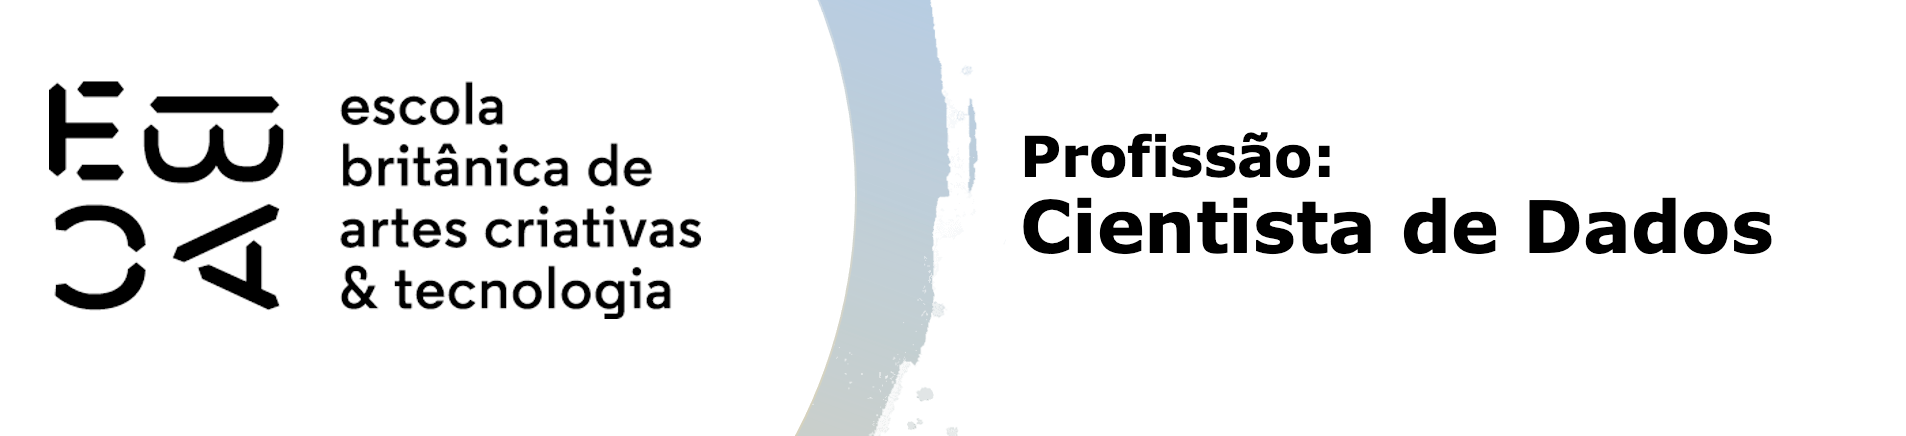

# Tarefa II

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
#carregando pacotes e bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#carregando dados
df = pd.read_pickle("base_nfp.pkl")
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [3]:
#criando variáveis temporais.
#dia da semana.
df['dia_da_semana'] = df['Data Emissão'].dt.day_name()

# criando variável final_semana mapeando valores de 'dia_da_semana' para 1 se for sábado ou domingo e 0 para os outros.
df['final_semana'] = df['dia_da_semana'].map(
    lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

#Criando variavel trimestre.
df['trimestre'] = df['Data Emissão'].dt.quarter

df['mes'] = df['Data Emissão'].dt.month

#Criando variavel categorização da variável Valor NF, por quantís, em 5, 10, 20 e 50 categorias.

df['categorizacao_valor_nf'] = pd.qcut(
    df['Valor NF'],
    q=[0, 0.25, 0.5, 0.75, 1],
    labels=['Quartil 1', 'Quartil 2', 'Quartil 3', 'Quartil 4'])

In [4]:
#observando as novas variáveis criadas.
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria,dia_da_semana,final_semana,trimestre,mes,categorizacao_valor_nf
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado,Friday,0,2,6,Quartil 2
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto,Friday,0,2,6,Quartil 3
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes,Friday,0,2,6,Quartil 2
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes,Friday,0,2,6,Quartil 4
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes,Friday,0,2,6,Quartil 4


## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [5]:
#criando um novo dataframe com os metadados.
metadados = pd.DataFrame({'dtype': df.dtypes})

#Definindo o papel da variável.
metadados['papel'] = 'covariavel'
metadados.loc['flag_credito', 'papel'] = 'resposta'
#Definindo quantidade de valores únicos para a variável.
metadados['nunique'] = df.nunique()
#Verificando valores de eventos e não eventos. 

In [6]:
def IV(variavel, resposta) -> float:
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento] / tab.loc['total', rótulo_evento]
    tab['pct_nao_evento'] = tab[rótulo_nao_evento] / tab.loc['total',
                                                             rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento / tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento) * tab.woe
    return tab['iv_parcial'].sum()

In [7]:
for var in metadados[metadados.papel == 'covariavel'].index:
    metadados.loc[var, 'IV'] = IV(df[var], df.flag_credito)
metadados

C:\Users\sann_\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sann_\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sann_\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sann_\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sann_\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sann_\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in l

,dtype,papel,nunique,IV
CNPJ emit.,object,covariavel,19606,inf
Emitente,object,covariavel,15575,inf
No.,int64,covariavel,124400,inf
Data Emissão,datetime64[ns],covariavel,1815,inf
Valor NF,float64,covariavel,33658,inf
Data Registro,datetime64[ns],covariavel,1817,inf
Créditos,float64,covariavel,9717,inf
Situação do Crédito,category,covariavel,3,inf
Ano,int64,covariavel,5,0.041651
Semestre,int64,covariavel,2,0.001258


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

As categorias com maior poder de discriminação segundo o IV são:

  <font color='red'>**Categoria:**</font> com IV de 0,41.
    
  <font color='red'>**Ano:**</font> com IV de 0.041651.
    
Quanto a categorização de variaveis continuas.
Sim, parece haver uma relação pois variaveis continuas apresentam IV inferior a 0. Por outro lado a categorização das variaveis continuas parece representar melhor a relação entre a variavel resposta e a variavel estudada.

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

In [8]:
df.set_index('Data Emissão', inplace=True)

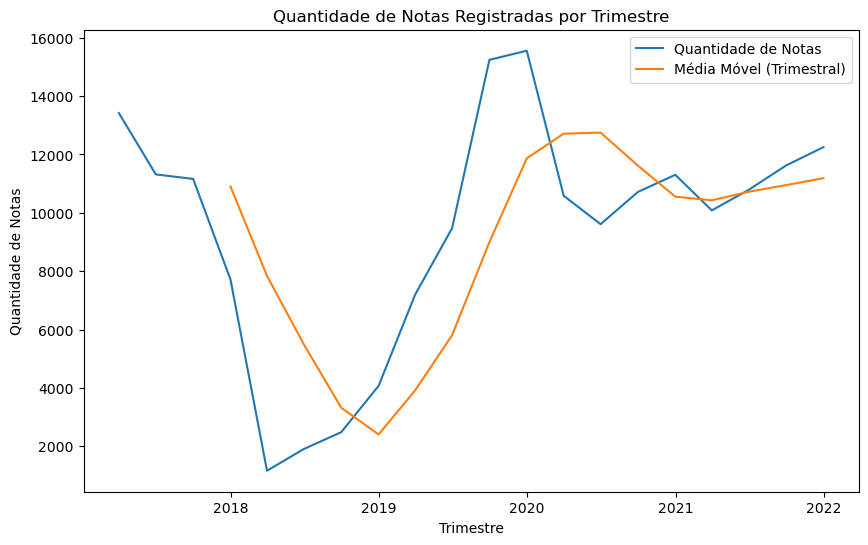

In [9]:
df_trimestre = df.resample('Q')['No.'].count()
media_movel = df_trimestre.rolling(window=4).mean()

plt.figure(figsize=(10, 6))
plt.plot(df_trimestre.index, df_trimestre, label='Quantidade de Notas')
plt.plot(df_trimestre.index, media_movel, label='Média Móvel (Trimestral)')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas')
plt.title('Quantidade de Notas Registradas por Trimestre')
plt.legend()
plt.show()

In [10]:
df_trimestre

Data Emissão
2017-03-31    13418
2017-06-30    11315
2017-09-30    11162
2017-12-31     7713
2018-03-31     1160
2018-06-30     1906
2018-09-30     2482
2018-12-31     4071
2019-03-31     7196
2019-06-30     9470
2019-09-30    15242
2019-12-31    15555
2020-03-31    10584
2020-06-30     9610
2020-09-30    10716
2020-12-31    11302
2021-03-31    10083
2021-06-30    10788
2021-09-30    11622
2021-12-31    12251
Freq: Q-DEC, Name: No., dtype: int64

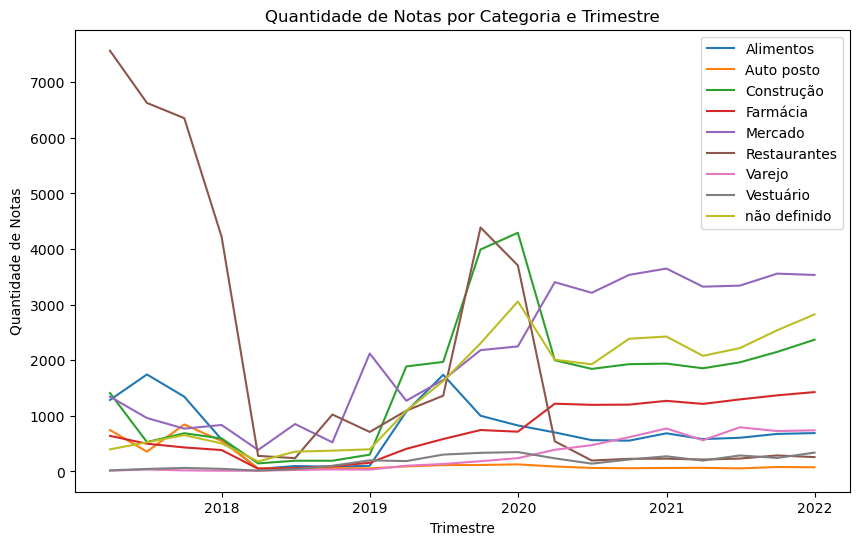

In [11]:
df_agregado = df.groupby([pd.Grouper(freq='Q'), 'categoria']).size().unstack()

plt.figure(figsize=(10, 6))
for categoria in df_agregado.columns:
    plt.plot(df_agregado.index, df_agregado[categoria], label=categoria)
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas')
plt.title('Quantidade de Notas por Categoria e Trimestre')
plt.legend()
plt.show()

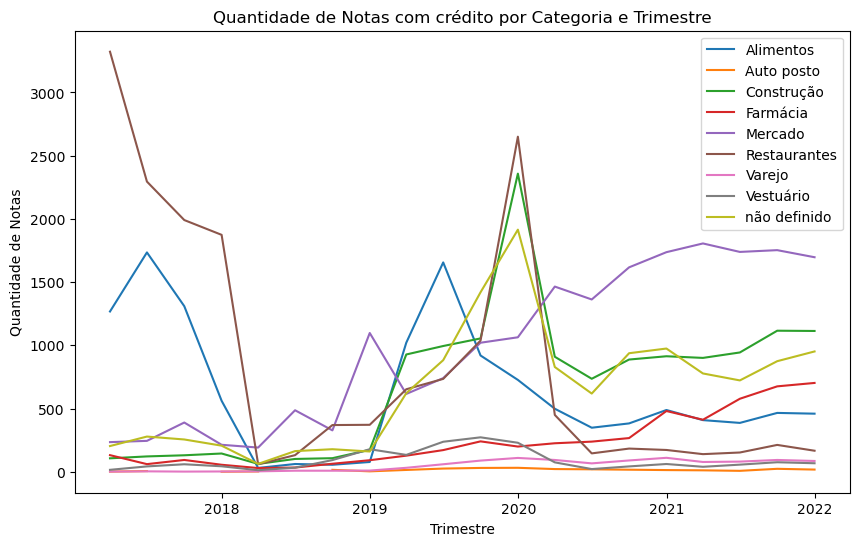

In [12]:
# Agrupando as notas com flag_credito = 1 por categoria e trimestre
df_agrupado = df[df['flag_credito'] == 1].groupby([pd.Grouper(freq='Q'), 'categoria']).size().unstack()

plt.figure(figsize=(10, 6))
for categoria in df_agrupado.columns:
    plt.plot(df_agrupado.index, df_agrupado[categoria], label=categoria)
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas')
plt.title('Quantidade de Notas com crédito por Categoria e Trimestre')
plt.legend()
plt.show()

## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

In [13]:
# Criação do DataFrame secundário
df1 = df[['flag_credito', 'categoria', 'Ano', 'mes']]

# Criação das colunas de frequência
freq = df1.groupby(['Ano', 'mes', 'categoria'
                    ])['flag_credito'].value_counts().unstack(fill_value=0)
freq.columns = ['flag_credito_0', 'flag_credito_1']

# Reset do índice múltiplo
freq.reset_index(inplace=True)

# Mesclando as colunas de frequência com o DataFrame secundario
df1 = df1.merge(freq, on=['Ano', 'mes', 'categoria'], how='left')

# Remoção da coluna original 'flag_credito'
df1.drop('flag_credito', axis=1, inplace=True)


# Criar coluna 'mes-ano' formatada
df1['mes_ano'] = df1.apply(lambda row: f"{row['mes']}-{row['Ano']}", axis=1)

# Converter 'mes-ano' para o formato de data
df1['mes_ano'] = pd.to_datetime(df1['mes_ano'], format='%m-%Y')
 
# Remoção da coluna original 'flag_credito'
df1.drop('Ano', axis=1, inplace=True)
df1.drop('mes', axis=1, inplace=True)

# Removendo as linhas duplicadas
df1.drop_duplicates(inplace=True)

In [19]:
#Criando colunas com as metricas para calculo do woe e IV

rotulo_ev, rotulo_nev = ('flag_credito_1', 'flag_credito_0')

df1['pct_evento'] = df1[rotulo_ev] / (df1[rotulo_ev] + df1[rotulo_nev])
df1['pct_nao_evento'] = df1[rotulo_nev] / (df1[rotulo_ev] + df1[rotulo_nev])
df1['woe'] = np.log(df1.pct_evento / df1.pct_nao_evento)

# Verificando df1
df1

C:\Users\sann_\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,categoria,flag_credito_0,flag_credito_1,mes_ano,pct_evento,pct_nao_evento,woe
0,Mercado,165,85,2017-06-01,0.340000,0.660000,-0.663294
1,Auto posto,106,6,2017-06-01,0.053571,0.946429,-2.871680
2,Restaurantes,1072,647,2017-06-01,0.376382,0.623618,-0.504935
25,Farmácia,76,14,2017-06-01,0.155556,0.844444,-1.691676
27,não definido,86,82,2017-06-01,0.488095,0.511905,-0.047628
...,...,...,...,...,...,...,...
148962,Auto posto,17,4,2021-07-01,0.190476,0.809524,-1.446919
149604,Auto posto,15,5,2021-02-01,0.250000,0.750000,-1.098612
149673,Vestuário,51,22,2021-01-01,0.301370,0.698630,-0.840783
152238,Auto posto,15,14,2021-09-01,0.482759,0.517241,-0.068993


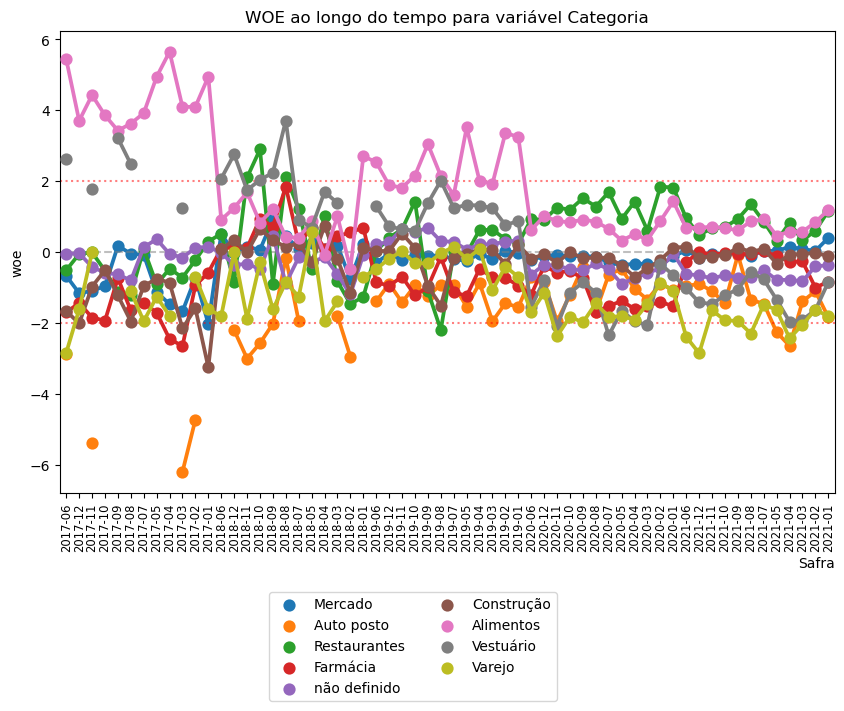

In [20]:
#Plotando WOE

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(10, 6))


# Variável que deseja analisar
variavel = 'categoria'

# Comando principal do gráfico
sns.pointplot(data=df1.reset_index(), y='woe', x='mes_ano', hue=variavel, ax=ax)

# Rotacionar os rótulos do eixo X
labs = df1['mes_ano'].unique()
labs2 = [pd.Period(x, freq='M') for x in labs]
ax.set_xticklabels(labs2, rotation=90, fontsize='small')

# Definir limites do gráfico
#ymax = max(1.2, max(df1['woe']))
#ymin = min(-1.2, min(df1['woe']))
#ax.set_ylim([ymin, ymax])

# Linhas de referência
ax.axhline(2, linestyle=':', color='red', alpha=.5)
ax.axhline(0, linestyle='--', color='grey', alpha=.5)
ax.axhline(-2, linestyle=':', color='red', alpha=.5)

# Títulos
ax.set_title(f'WOE ao longo do tempo para variável {variavel.capitalize()}')
ax.set_xlabel('Safra', loc='right')

# Legendas
ax.legend(bbox_to_anchor=(.65, -.2), ncol=2)

plt.show()

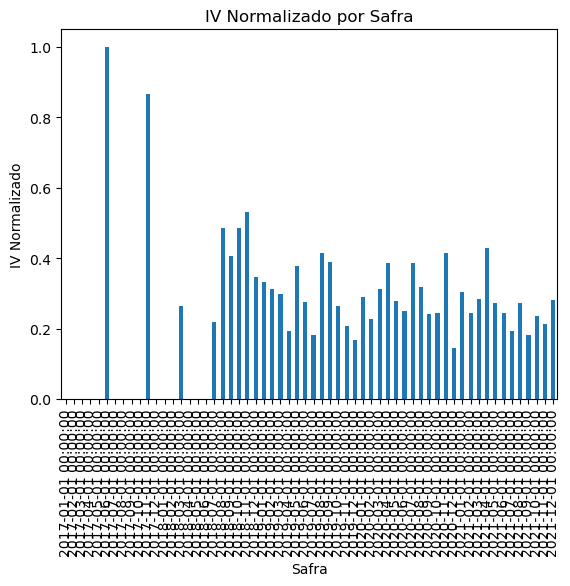

In [36]:
iv_cat = ((df1.pct_evento - df1.pct_nao_evento) * df1.woe).groupby(df1['mes_ano']).sum()
iv_max = iv_cat[np.isfinite(iv_cat)].max()
iv_normalized = iv_cat / iv_max

iv_normalized.plot.bar()
plt.xlabel('Safra')
plt.ylabel('IV Normalizado')
plt.title('IV Normalizado por Safra')
plt.show()

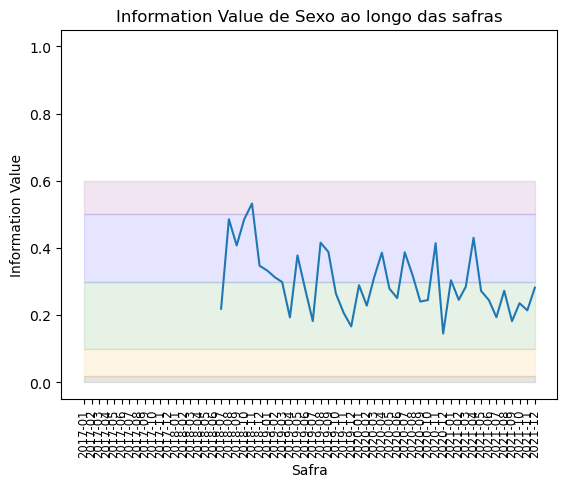

In [39]:
def plot_iv(IV):
    fig, ax = plt.subplots()
    x = IV.index
    a = [.02]*len(IV.index)
    b = [.1]*len(IV.index)
    c = [.3]*len(IV.index)
    d = [.5]*len(IV.index)
    e = [.6]*len(IV.index)

    ax.fill_between(IV.index, a, color='grey', alpha=.2)
    ax.fill_between(IV.index, a, b, color='orange', alpha=.1)
    ax.fill_between(IV.index, b, c, color='green', alpha=.1)
    ax.fill_between(IV.index, c, d, color='blue', alpha=.1)
    ax.fill_between(IV.index, d, e, color='purple', alpha=.1)
    ax.plot(IV)

    labs = IV.index.get_level_values(level=0).unique()
    labs2 = [x.to_period('M') for x in labs]

    ax.set_xticks(labs)
    ax.set_xticklabels(labs2,rotation=90, fontsize='small')

    ax.set_title("Information Value de Sexo ao longo das safras")
    ax.set_ylabel("Information Value")
    ax.set_xlabel("Safra")
    
plot_iv(iv_normalized)

## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

> Quais categorias parece ter maior proporção de notas com retornos maiores que zero?

Considerando os dados a partir de 2020, os setores com notas que apresentam maior possibilidade de retorno são mercados, restaurantes e construção.

> Essas diferenças são estáveis no tempo?

A partir de 2021, os dados se tornam mais estáveis e deixam de apresentar uma variabilidade tão grande, seja devido a uma melhora no processo de captação dos dados ou à estabilização do comportamento da população estudada durante o período de pandemia.